# Working with natural language tools to explore The Count of Monte Cristo
https://danieljohndavis.github.io/word-frequency.html

In [5]:
import requests
import nltk
from bs4 import BeautifulSoup

# retrieving text from Project Gutenburg
r = requests.get('https://www.gutenberg.org/files/1184/1184-h/1184-h.htm')

# set encoding
r.encoding = 'utf-8'

# extract html
html = r.text

# test with a print
print(html[0:100])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//E


In [6]:
# trying this BeautifulSoup trick
soup = BeautifulSoup(html, 'html.parser')

# gimme that text
text = soup.get_text()

# test print of text
print(text[20000:40000])


    

      “No. I gave the custom-house officers a copy of our bill of lading;
      and as to the other papers, they sent a man off with the pilot, to whom I
      gave them.”
    

      “Then you have nothing more to do here?”
    

      “No—everything is all right now.”
    

      “Then you can come and dine with me?”
    

      “I really must ask you to excuse me, M. Morrel. My first visit is
      due to my father, though I am not the less grateful for the honor you have
      done me.”
    




 


      “Right, Dantès, quite right. I always knew you were a good son.”
    

      “And,” inquired Dantès, with some hesitation, “do you
      know how my father is?”
    

      “Well, I believe, my dear Edmond, though I have not seen him lately.”
    

      “Yes, he likes to keep himself shut up in his little room.”
    

      “That proves, at least, that he has wanted for nothing during your
      absence.”
    

      Dantès smiled. “My father is proud, sir, and if he had n

In [7]:
# tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# tokenize text
tokens = tokenizer.tokenize(text)

# print some tokens
print(tokens[:11])

['The', 'Count', 'of', 'Monte', 'Cristo', 'by', 'Alexandre', 'Dumas', 'père', 'body', 'margin']


In [8]:
# force lower on all words so capitalization isn't treated as unique
words = []

for word in tokens:
    words.append(word.lower())

print(words[0:11])


['the', 'count', 'of', 'monte', 'cristo', 'by', 'alexandre', 'dumas', 'père', 'body', 'margin']


In [26]:
#nltk.download() -- didn't need to do this, turns out. upgraded anaconda

# remove stop words using built-in functionality of nltk. came back and added 'said'
sw = nltk.corpus.stopwords.words('english')
addl_sw = ['said']
sw.extend(addl_sw)

print(sw[0:11])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


In [30]:
# get list of words without stop words

use_words = [word for word in words if word not in sw]

print(use_words[:11])

['count', 'monte', 'cristo', 'alexandre', 'dumas', 'père', 'body', 'margin', '5', 'background', 'faebd0']


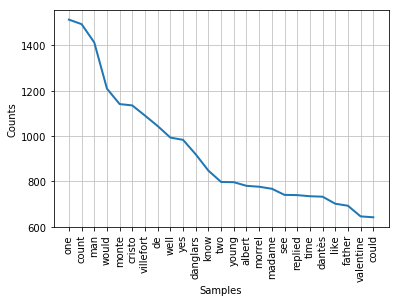

In [31]:
# sweet pretty sure we're good to go

%matplotlib inline

freqdist = nltk.FreqDist(use_words)

freqdist.plot(25)

In [33]:
# what else would be interesting to look at?

for word, frequency in freqdist.most_common(30):
    print(u'{};{}'.format(word, frequency))

one;1514
count;1494
man;1413
would;1209
monte;1141
cristo;1135
villefort;1090
de;1044
well;993
yes;983
danglars;919
know;847
two;797
young;796
albert;780
morrel;776
madame;767
see;740
replied;739
time;734
dantès;732
like;701
father;692
valentine;645
could;641
sir;615
shall;609
made;595
say;595
must;587
